<a href="https://colab.research.google.com/github/zeyad-mohvme-d/-Sign-Language-Fingerspelling-Assistant-ASL-Alphabet-/blob/main/ASL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
import os

In [ ]:
import kagglehub

path = kagglehub.dataset_download("grassknoted/asl-alphabet")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'asl-alphabet' dataset.
Path to dataset files: /kaggle/input/asl-alphabet


In [ ]:
path = "/kaggle/input/asl-alphabet"

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(path, "asl_alphabet_train/asl_alphabet_train"),
    validation_split = 0.1,
    subset = "training",
    seed = 123,
    shuffle = True,
    image_size = (128, 128),
    batch_size = 32
)


val_data = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(path, "asl_alphabet_train", "asl_alphabet_train"),
    validation_split=0.1,
    subset="validation",
    seed=123,
    shuffle = True,
    image_size=(128, 128),
    batch_size=32

)

Found 87000 files belonging to 29 classes.
Using 78300 files for training.
Found 87000 files belonging to 29 classes.
Using 8700 files for validation.


In [ ]:
type(train_data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [ ]:
len(train_data)

2447

In [ ]:
clas_names = train_data.class_names
clas_names

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'del',
 'nothing',
 'space']

In [ ]:
m = {}

for i in range(26):
    m[chr(ord('A') + i)] = i

m["nothing"] = 27
m["space"] = 28

In [ ]:
test_data = []
test_labels = []

test_path = os.path.join(path, "asl_alphabet_test", "asl_alphabet_test")
image_size = (128, 128)


for filename in os.listdir(test_path):
  img_path = os.path.join(test_path, filename)
  char = filename.split("_")[0]
  test_labels.append(m[char])
  img = load_img(img_path, target_size=image_size)
  img_array = img_to_array(img)
  test_data.append(img_array)



print(test_data[0].shape)
print(test_labels)


test_data = np.array(test_data)
test_labels = np.array(test_labels)




(128, 128, 3)
[0, 4, 11, 13, 18, 3, 6, 8, 22, 12, 27, 23, 7, 16, 2, 19, 15, 21, 24, 20, 28, 14, 1, 17, 5, 25, 9, 10]


In [ ]:
images, labels = next(iter(train_data))

images = images.numpy()
labels = labels.numpy()


In [ ]:
from tensorflow.keras.layers import RandomRotation, RandomBrightness, RandomZoom, RandomContrast, Rescaling



data_Augmentation  = tf.keras.Sequential([
    Rescaling(1./255),
    RandomRotation(0.2),
    RandomZoom(0.2),
])

In [ ]:
aug = data_Augmentation(images)

type(aug)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
print(type(images))      # هل NumPy array ولا Tensor؟
print(images.dtype)      # float32, uint8, إلخ
print(images.shape)      # شكل الصور (batch, height, width, channels)
print(np.min(images), np.max(images))

<class 'numpy.ndarray'>
float32
(32, 128, 128, 3)
0.0 255.0


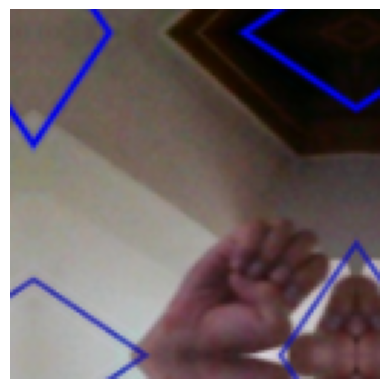

In [ ]:
plt.imshow(aug[4])
plt.axis('off')
plt.show()

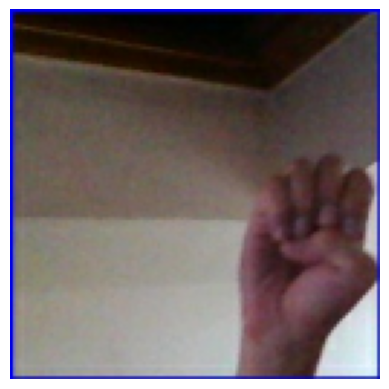

In [ ]:
images = images / 255.0

plt.imshow(images[4])
plt.axis('off')
plt.show()

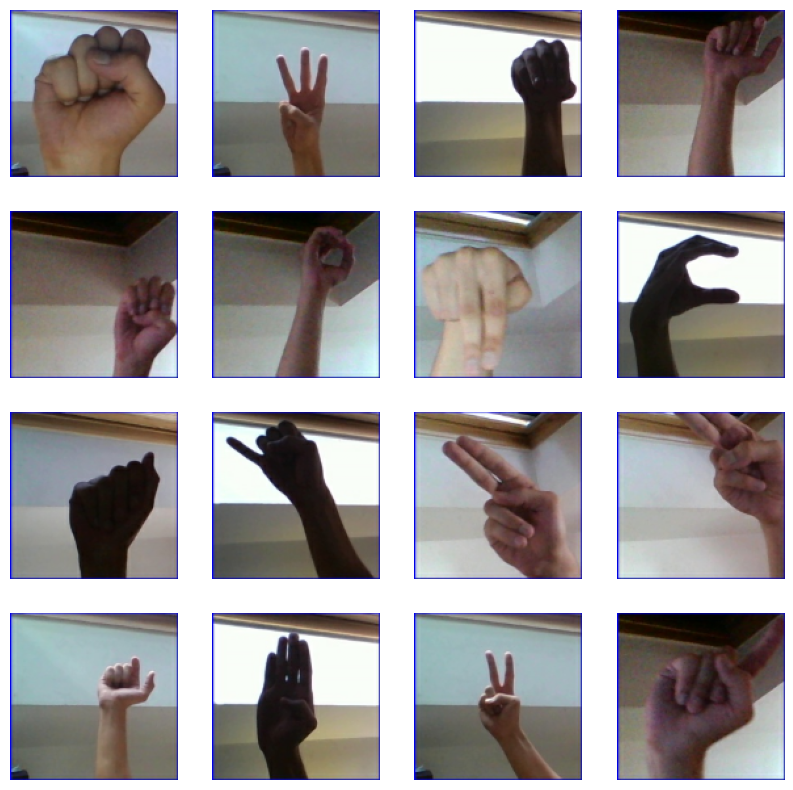

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

for i in range(4):
    for j in range(4):
        idx = i*4 + j
        axes[i, j].imshow(images[idx])
        axes[i, j].axis('off')

plt.show()

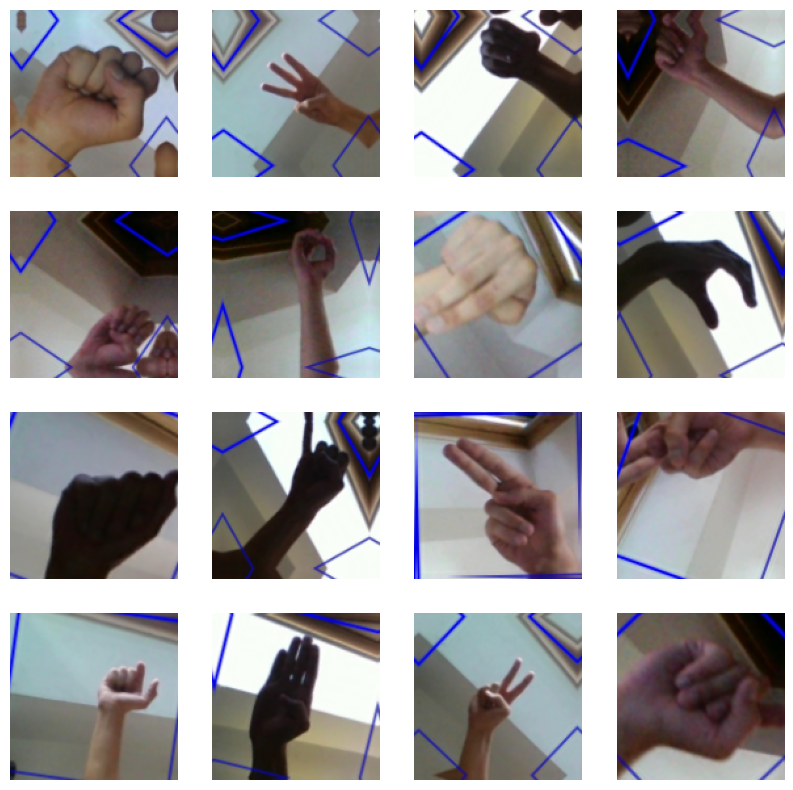

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

for i in range(4):
    for j in range(4):
        idx = i*4 + j
        axes[i, j].imshow(aug[idx])
        axes[i, j].axis('off')

plt.show()

In [ ]:
# num_classes = 29

# def one_hot(x, y):
#     y = tf.keras.utils.to_categorical(y, num_classes)
#     return x, y

In [ ]:
# train_data = train_data.map(one_hot)
# val_data = val_data.map(one_hot)

In [ ]:
from tensorflow.keras.layers import Conv2D, Dropout, Input, GlobalAveragePooling2D, Dense, BatchNormalization, MaxPool2D, Rescaling, RandomRotation, RandomZoom, Flatten
NUMBER_OF_CLASSES = 29

model = tf.keras.models.Sequential([
    Input((128, 128, 3)),

    Rescaling(1./255),
    RandomRotation(0.2),
    RandomZoom(0.2),

    Conv2D(64, (3, 3), padding="same", activation="relu"),
    # Dropout(0.2),
    MaxPool2D(),

    Conv2D(64, (3, 3), padding='same', activation="relu"),
    # Dropout(0.3),
    MaxPool2D(),

    Conv2D(128, (3, 3), padding='same', activation="relu"),
    Dropout(0.3),
    MaxPool2D(),

    Flatten(), # Replaced GlobalAveragePooling2D with Flatten
    # Dropout(0.3), # This dropout can be uncommented if desired after pooling
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(NUMBER_OF_CLASSES, activation="softmax")
])




# model = tf.keras.Sequential([

#     # -------------------------------
#     # 🔹 Input + Normalization + Augmentation
#     # -------------------------------
#     Input((128, 128, 3)),
#     Rescaling(1./255),
#     RandomRotation(0.15),
#     RandomZoom(0.15),

#     # -------------------------------
#     # 🔹 Convolution Block 1
#     # -------------------------------
#     Conv2D(64, (3, 3), padding="same", activation="relu"),
#     MaxPool2D(),

#     # -------------------------------
#     # 🔹 Convolution Block 2
#     # -------------------------------
#     Conv2D(128, (3, 3), padding="same", activation="relu"),
#     MaxPool2D(),

#     # -------------------------------
#     # 🔹 Convolution Block 3
#     # -------------------------------
#     Conv2D(256, (3, 3), padding="same", activation="relu"),
#     MaxPool2D(),
#     Dropout(0.3),

#     # -------------------------------
#     # 🔹 Feature Aggregation
#     # -------------------------------
#     Flatten(),

#     # -------------------------------
#     # 🔹 Dense Classifier
#     # -------------------------------
#     Dense(128, activation="relu"),
#     Dropout(0.3),
#     Dense(64, activation="relu"),

#     # -------------------------------
#     # 🔹 Output Layer
#     # -------------------------------
#     Dense(NUMBER_OF_CLASSES, activation="softmax")
# ])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer="adam", metrics=["accuracy"])

In [ ]:
# prob_model = tf.keras.models.Sequential([
#     model,
#     tf.keras.layers.Softmax()
# ])

In [ ]:
history = model.fit(train_data,batch_size=32, epochs=30, validation_data=val_data, callbacks=[early_stopping])

Epoch 1/30
2447/2447 ━━━━━━━━━━━━━━━━━━━━ 98s 40ms/step - accuracy: 0.8663 - loss: 0.3820 - val_accuracy: 0.9187 - val_loss: 0.2371
Epoch 2/30
2447/2447 ━━━━━━━━━━━━━━━━━━━━ 96s 39ms/step - accuracy: 0.8913 - loss: 0.3111 - val_accuracy: 0.9440 - val_loss: 0.1676
Epoch 3/30
2447/2447 ━━━━━━━━━━━━━━━━━━━━ 96s 39ms/step - accuracy: 0.9077 - loss: 0.2666 - val_accuracy: 0.9398 - val_loss: 0.1745
Epoch 4/30
2447/2447 ━━━━━━━━━━━━━━━━━━━━ 97s 39ms/step - accuracy: 0.9204 - loss: 0.2313 - val_accuracy: 0.9438 - val_loss: 0.1630
Epoch 5/30
2447/2447 ━━━━━━━━━━━━━━━━━━━━ 96s 39ms/step - accuracy: 0.9272 - loss: 0.2078 - val_accuracy: 0.9568 - val_loss: 0.1229
Epoch 6/30
2447/2447 ━━━━━━━━━━━━━━━━━━━━ 96s 39ms/step - accuracy: 0.9358 - loss: 0.1839 - val_accuracy: 0.9480 - val_loss: 0.1478
Epoch 7/30
2447/2447 ━━━━━━━━━━━━━━━━━━━━ 97s 40ms/step - accuracy: 0.9416 - loss: 0.1694 - val_accuracy: 0.9586 - val_loss: 0.1184
Epoch 8/30
2447/2447 ━━━━━━━━━━━━━━━━━━━━ 141s 39ms/step - accuracy: 0.9439 

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# ===========================
# 1. Load Dataset
# ===========================

IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
NUMBER_OF_CLASSES = 29



# ===========================
# 3. Load EfficientNetB0
# ===========================

base_model = EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=(128, 128, 3)
)

base_model.trainable = False  # Freeze weights

# ===========================
# 4. Build Final Model
# ===========================

inputs = tf.keras.Input(shape=(128, 128, 3))

x = data_augmentation(inputs)
x = tf.keras.applications.efficientnet.preprocess_input(x)

x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)

x = Dense(256, activation="relu")(x)
x = Dropout(0.3)(x)

outputs = Dense(NUMBER_OF_CLASSES, activation="softmax")(x)

model = Model(inputs, outputs)

# ===========================
# 5. Compile
# ===========================

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# ===========================
# 6. Early Stopping
# ===========================

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

# ===========================
# 7. Train
# ===========================

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    callbacks=[early_stopping]
)

# ===========================
# 8. Evaluate
# ===========================

loss, acc = model.evaluate(val_data)
print("Validation Accuracy:", acc)
